Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


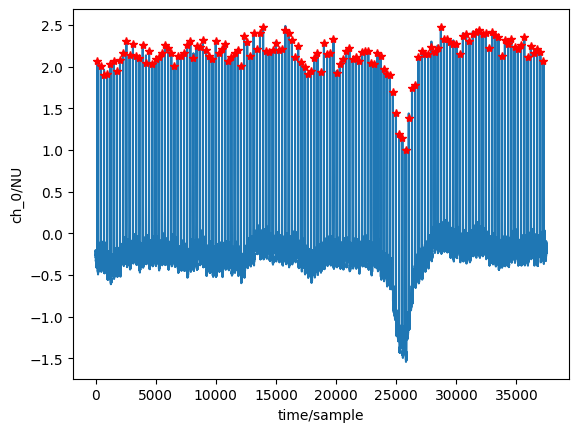

In [3]:
import wfdb
import math
from wfdb import processing  # for xqrs detection


rmeans = {'filename': 'rmean'}
rstandard_deviation = {'filename': 'rstd'}
rinvalid = []


def mean_std(file_path, file_name, start, stop):

    file_destination = file_path+file_name
    sig, fields = wfdb.rdsamp(file_destination, channels=[
                              0], sampfrom=start, sampto=stop)
    xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
    xqrs.detect()

    # print(fields)
    wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds]  )

    # sqrs.qrs_inds is array containing indexes of qrs ?

    rpeaksum = 0
    for i in xqrs.qrs_inds:
        rpeaksum += sig[i]
    try:
        rmean = (rpeaksum/len(xqrs.qrs_inds))
        rmeans[file_name] = float(rmean)
        rstdsum = 0
        for i in xqrs.qrs_inds:
            rstdsum += (sig[i]-rmean)**2
        rstd = math.sqrt(rstdsum/len(xqrs.qrs_inds))
        # print("standard deviation is",rstd)
        rstandard_deviation[file_name] = float(rstd)

    except ZeroDivisionError:
        rinvalid.append(file_name)


def main():
    file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
    file_name = "\cu01"
    file_destination = file_path+file_name
    stop = 53542-7500
    start = stop - 37500  # 7500 samples = 30 seconds
    mean_std(file_path, file_name, start, stop)
    # print(rmeans)
    # print(rinvalid)
    # print(rstandard_deviation)


main()


Area??


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


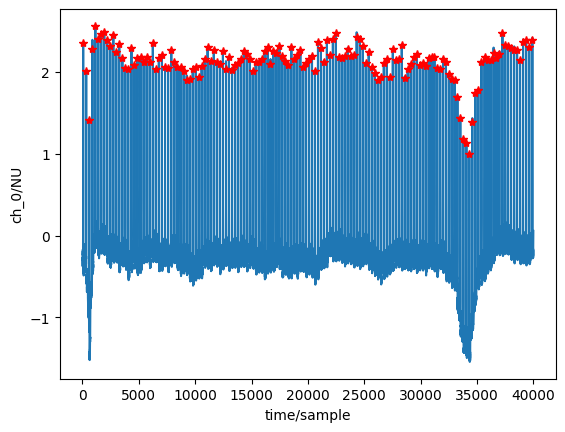

In [25]:
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
sig, fields = wfdb.rdsamp(file_destination, channels=[0], sampto=40000)
xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])


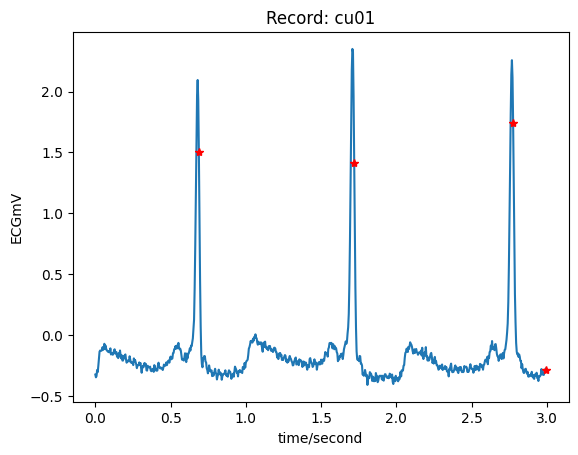

In [1]:
import wfdb
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 750  # 7500 samples = 30 seconds
record = wfdb.rdrecord(file_destination, sampfrom=start, sampto=stop)
annotation = wfdb.rdann(file_destination, 'atr',
                        sampfrom=start, sampto=stop, shift_samps=True)
wfdb.plot_wfdb(record=record,
               annotation=annotation,
               time_units='seconds')


In [14]:
import wfdb
import wfdb.processing as wp

# record = wfdb.rdrecord('filename')  # Replace 'filename' with the name of your ECG record
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 750  # 7500 samples = 30 seconds
record = wfdb.rdrecord(file_destination, sampfrom=start, sampto=stop)
signal = record.p_signal[:, 0]  # Extract the first channel of the signal

# Find R-peaks using the gqrs algorithm
qrs_inds = wp.gqrs_detect(sig=signal, fs=record.fs)

import numpy as np

peak_areas = []
for i in range(len(qrs_inds)-1):
    peak_start = qrs_inds[i]
    peak_end = qrs_inds[i+1]
    peak_signal = signal[peak_start:peak_end]
    peak_area = np.trapz(peak_signal)
    peak_areas.append(peak_area)
print(peak_areas)


[-1.33]


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


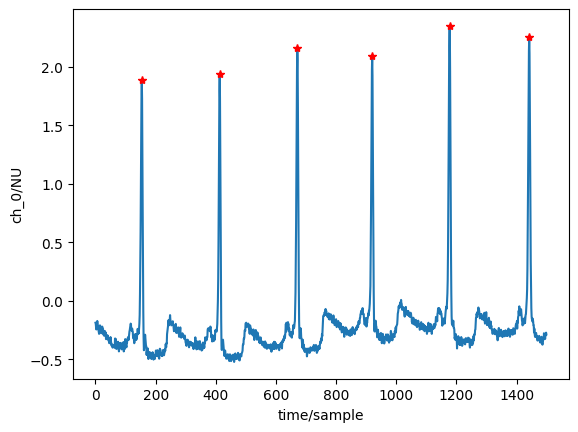

[ 154  413  671  920 1177 1442]
124 184


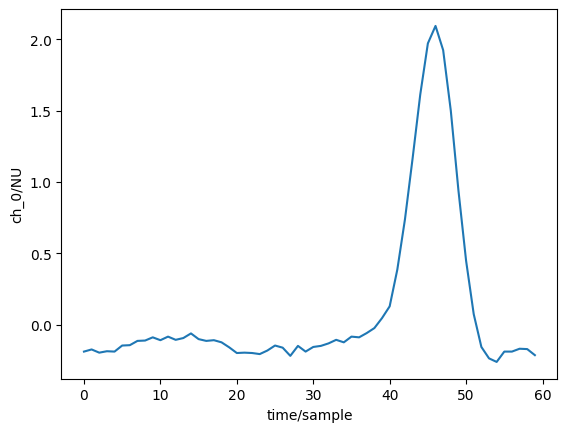

383 443


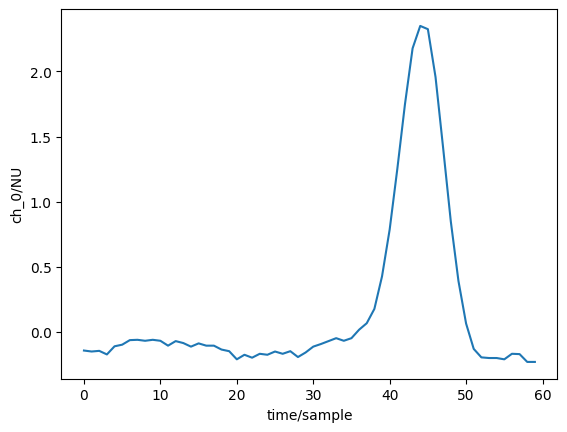

641 701


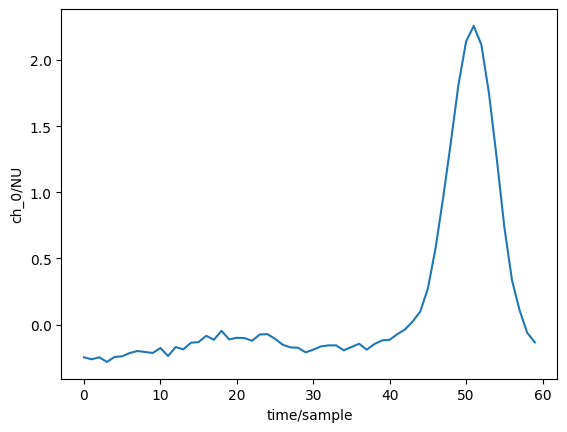

890 950


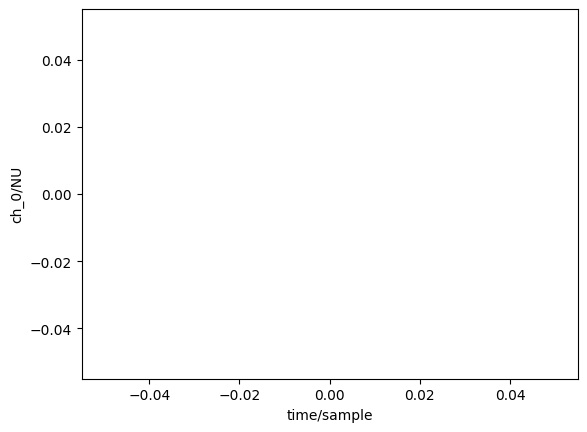

1147 1207


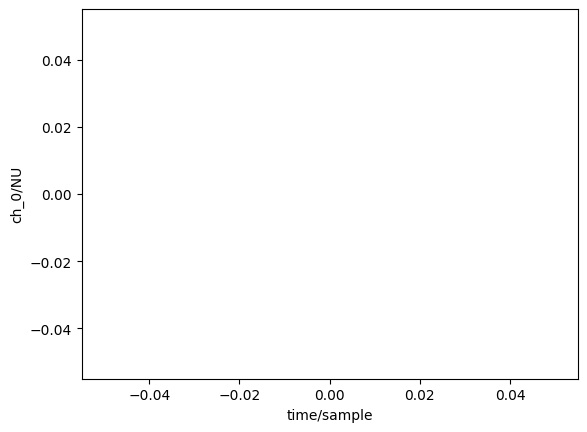

1412 1472


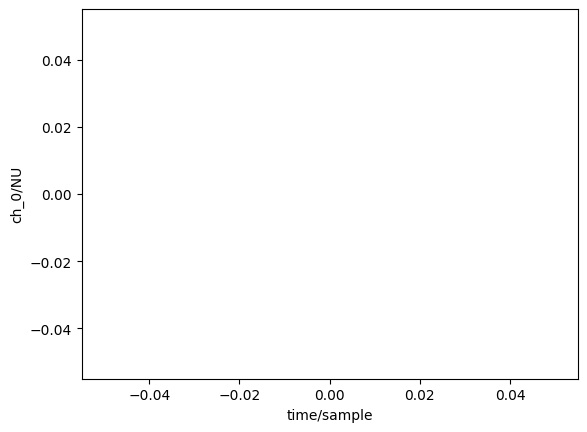

In [33]:
import wfdb
import math
from wfdb import processing  # for xqrs detection

file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 1500  # 7500 samples = 30 seconds


sig, fields = wfdb.rdsamp(file_destination, channels=[0], sampfrom=start, sampto=stop)
xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])
print(xqrs.qrs_inds)



for i in range(len(xqrs.qrs_inds)):
    peak_start = xqrs.qrs_inds[i]-30
    peak_end = xqrs.qrs_inds[i]+30
    print(peak_start, peak_end)
    peak_signal = signal[peak_start:peak_end]
    wfdb.plot_items(signal=peak_signal)
